# Some things to know before getting started. 
You will see some reoccruing things like numcol, nAllNeonics, etc. Here I will stated what that means.


numCol:number of honey producing colonies

Yiedlpercol: honey yield per colony in pounds

totalprod: total production (numcol x yieldpercol) also in pounds

stocks: stocks held by producer

priceperlb: average price per pound based on sales in US Dollars

prodvalue: value of production (totalprod x priceperlb)

nAllNeonic: amount in Kg of all neonic compunds applied. So every variation of neonic, added togeather. 

Individual neonic compunds are: nCLOTHIANIDIN, nIMIDACLOPRID, nTHIAMETHOXAM, nACETAMIPRID, and nTHIACLOPRID


# What are neonicotinoids?
Neonics are among the most popular insecticides in the world and is chemically related to nicotine. They are coated onto crop seeds and being water soluble they are taken up and dispersed throughout the plant. Sometimes they are sprayed onto foliage. Neonic residues accumulate in pollen and nectar of treated plants and pose a potential risk to pollinators.

In [165]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy as sp
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
plt.style.use(['seaborn-dark'])
%config IPCompleter.greedy=True
from IPython.display import display
from IPython.display import Image
from bubbly.bubbly import bubbleplot 
import warnings
warnings.filterwarnings('ignore')

In [166]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

For visualization I split the dataset into pre-and post neonics (2003) as you will see neonics were more heavily used after 2003. 

This data set contains information on neonic usage per state from 1991 to 2016.


# A Data Analysis on the Potential Effects of Neonicotinoids and Bee population

## Questions:
How do neonics effect bees as a whole? Do they impact impact total production? Yield per colony? Number of colonies?

What specific neonic compounds were most frequently used per state and over time?

Has production value and stocks increased or decreased with neonic usage?

In [167]:
df=pd.read_csv('C:\\Users\\Mike\\Desktop\\vHoneyNeonic_v03.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,LandArea
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8,50645
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6,50645
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5,50645
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN,50645
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN,50645


In [168]:
df.isnull().sum()

state              0
numcol             0
yieldpercol        0
totalprod          0
stocks             0
priceperlb         0
prodvalue          0
year               0
StateName          0
Region             0
FIPS               0
nCLOTHIANIDIN    237
nIMIDACLOPRID    237
nTHIAMETHOXAM    237
nACETAMIPRID     237
nTHIACLOPRID     237
nAllNeonic       237
LandArea           0
dtype: int64

In [169]:
df=df.fillna(0)

In [170]:
df.shape

(1132, 18)

In [171]:
df.dtypes

state             object
numcol           float64
yieldpercol        int64
totalprod        float64
stocks           float64
priceperlb       float64
prodvalue        float64
year               int64
StateName         object
Region            object
FIPS               int64
nCLOTHIANIDIN    float64
nIMIDACLOPRID    float64
nTHIAMETHOXAM    float64
nACETAMIPRID     float64
nTHIACLOPRID     float64
nAllNeonic       float64
LandArea           int64
dtype: object

In [172]:
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['state', 'StateName', 'Region'], dtype='object')

In [173]:
for column in object_columns: 
    df[column] = df[column].astype('category')
df.dtypes

state            category
numcol            float64
yieldpercol         int64
totalprod         float64
stocks            float64
priceperlb        float64
prodvalue         float64
year                int64
StateName        category
Region           category
FIPS                int64
nCLOTHIANIDIN     float64
nIMIDACLOPRID     float64
nTHIAMETHOXAM     float64
nACETAMIPRID      float64
nTHIACLOPRID      float64
nAllNeonic        float64
LandArea            int64
dtype: object

In [174]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
numcol,1132.0,6.245230e+04,9.069802e+04,2000.00,10000.000,27000.00,69250.000,520000.00
yieldpercol,1132.0,6.180919e+01,2.070181e+01,19.00,47.000,60.00,74.000,177.00
totalprod,1132.0,4.317093e+06,6.962385e+06,84000.00,519250.000,1607500.00,4325000.000,46410000.00
stocks,1132.0,1.202020e+06,2.026242e+06,8000.00,128000.000,411000.00,1377000.000,13800000.00
priceperlb,1132.0,1.485928e+00,9.665828e-01,0.46,0.750,1.26,1.920,7.86
prodvalue,1132.0,4.932350e+06,8.551674e+06,89000.00,813750.000,1936000.00,4842500.000,83859000.00
year,1132.0,2.003699e+03,7.783332e+00,1991.00,1997.000,2003.00,2010.000,2017.00
FIPS,1132.0,3.027562e+01,1.558667e+01,1.00,18.000,30.00,42.750,56.00
nCLOTHIANIDIN,1132.0,7.321552e+03,2.497527e+04,0.00,0.000,0.00,1754.325,278498.80
nIMIDACLOPRID,1132.0,7.071545e+03,1.500990e+04,0.00,44.475,1717.30,6572.125,150569.30


In [175]:
df.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,LandArea
numcol,1.000000,0.241379,0.952677,0.809360,-0.187786,0.873836,0.004369,-0.103073,0.020764,0.360655,0.082446,0.286041,-0.028467,0.168612,0.378208
yieldpercol,0.241379,1.000000,0.396507,0.352407,-0.337930,0.239500,-0.215072,-0.109588,-0.053849,-0.088192,-0.008366,-0.104936,-0.095385,-0.069719,0.069888
totalprod,0.952677,0.396507,1.000000,0.851490,-0.220494,0.853131,-0.060457,-0.064675,0.001124,0.234814,0.057206,0.145510,-0.050082,0.101020,0.324038
stocks,0.809360,0.352407,0.851490,1.000000,-0.224134,0.711388,-0.046603,0.036676,0.012568,0.167130,0.045831,0.117558,-0.009889,0.080702,0.278394
priceperlb,-0.187786,-0.337930,-0.220494,-0.224134,1.000000,-0.003350,0.764124,0.082300,0.241838,0.201218,0.252317,0.053978,0.109371,0.265964,-0.186725
prodvalue,0.873836,0.239500,0.853131,0.711388,-0.003350,1.000000,0.215962,-0.024985,0.107994,0.343346,0.214183,0.211474,0.001056,0.236877,0.272709
year,0.004369,-0.215072,-0.060457,-0.046603,0.764124,0.215962,1.000000,-0.007667,0.280871,0.336769,0.416429,0.164397,0.168007,0.375658,-0.001310
FIPS,-0.103073,-0.109588,-0.064675,0.036676,0.082300,-0.024985,-0.007667,1.000000,-0.063544,-0.215502,-0.060939,-0.068696,0.131282,-0.126706,-0.008005
nCLOTHIANIDIN,0.020764,-0.053849,0.001124,0.012568,0.241838,0.107994,0.280871,-0.063544,1.000000,0.525981,0.756266,0.036553,0.007472,0.920708,0.008356
nIMIDACLOPRID,0.360655,-0.088192,0.234814,0.167130,0.201218,0.343346,0.336769,-0.215502,0.525981,1.000000,0.562003,0.551665,0.008663,0.796582,0.248260


In [176]:
print("Feature, UniqueValues") 
for column in df:
    print(column + "," + str(len(df[column].unique())))

Feature, UniqueValues
state,44
numcol,181
yieldpercol,111
totalprod,844
stocks,786
priceperlb,298
prodvalue,1023
year,27
StateName,44
Region,4
FIPS,44
nCLOTHIANIDIN,472
nIMIDACLOPRID,890
nTHIAMETHOXAM,614
nACETAMIPRID,421
nTHIACLOPRID,181
nAllNeonic,887
LandArea,43


In [177]:
df_pre_2003 = df[(df['year']<2003)]

In [178]:
df_2003 = df[(df['year']>=2003)]

In [179]:
df.groupby(['year'])['nAllNeonic'].sum()  

year
1991          0.0
1992          0.0
1993          0.0
1994      11207.2
1995      82134.0
1996     101002.5
1997     185898.7
1998     166324.4
1999     140227.8
2000     133949.2
2001     143690.4
2002     168746.2
2003     203264.0
2004     604129.3
2005     725936.4
2006     784637.7
2007    1039977.8
2008    1225943.7
2009    1467880.1
2010    1708859.8
2011    2247466.3
2012    2732574.3
2013    3084539.6
2014    3478478.9
2015     801069.0
2016     438780.4
2017          0.0
Name: nAllNeonic, dtype: float64

In [180]:
df['post-neonics(2003)'] = np.where(df['year']>=2003, 1, 0)

# Let's start small
<b>Exploring neonic amounts used before and after 2003</b>

In [181]:
#df_pre_2003.groupby(['year'])['nAllNeonic'].sum().plot(color='red')
#plt.title("Neonic usage prior to 2003")
df_summed = df_pre_2003.groupby(['year']) ['nAllNeonic'].sum().reset_index()
df_summed2= df_2003.groupby(['year']) ['nAllNeonic'].sum().reset_index()
#data=[go.Bar(x=df_summed.year, y=df_summed.nAllNeonic)]

#iplot(data, filename='testbar')
trace_high = go.Scatter(
    x=df_summed.year,
    y=df_summed.nAllNeonic,
    name = "Before 2003",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=df_summed2.year,
    y=df_summed2.nAllNeonic,
    name = "2003 and after",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Neonic usage before and after 2003',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='1m',
                     step='year',
                     stepmode='backward'),
                dict(count=22,
                     label='6m',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In the above graph you can clearly see that the heavy neonic use stated 2003 and after. The graph is interactive so go ahead and move the slider. There are a few presets that you can click to view some of the most prominant changes. 

In [182]:
#Timeline of neonic usage
#df.groupby(['year'])['nAllNeonic'].sum().plot(color='red')
#plt.title("Complete timeline of neonic usage")

#df_summed = df_pre_2003.groupby(['year']) ['nAllNeonic'].sum().reset_index()
#df_summed2= df_2003.groupby(['year']) ['nAllNeonic'].sum().reset_index()
#data=[go.Bar(x=df_summed.year, y=df_summed.nAllNeonic)]
df_summed0=df.groupby(['year'])['nAllNeonic'].sum().reset_index()
#iplot(data, filename='testbar')
trace_high = go.Scatter(
    x=df_summed0.year,
    y=df_summed0.nAllNeonic,
    name = "All Usage",
    line = dict(color = '#17BECF'),
    opacity = 0.8)


data = [trace_high]

layout = dict(
    title='Neonic usage before and after 2003',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='2y',
                     step='year',
                     stepmode='backward'),
                dict(count=22,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

Unlike the previous graph this is the neonic usage for the entire dataset, so 1991 to 2015. This is to reinforce the post 2003 surge. This is going to come in hand later. 

# Neonic usage by state

In [183]:
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,LandArea,post-neonics(2003)
912,TN,8000.0,59,472000.0,131000.0,1.39,656000.0,2001,Tennessee,South,47,0.0,1793.7,463.2,0.0,0.0,2256.9,41235,0
75,AZ,36000.0,50,1800000.0,720000.0,1.04,1872000.0,2005,Arizona,West,4,0.0,8633.8,141.2,2509.3,0.0,11284.3,113594,1
512,MO,14000.0,46,644000.0,148000.0,1.12,721000.0,2007,Missouri,Midwest,29,23367.3,7941.8,11287.0,46.2,0.0,42642.3,68742,1
653,NE,48000.0,46,2208000.0,640000.0,1.91,4217000.0,2016,Nebraska,Midwest,31,0.0,2165.9,1421.9,0.0,0.0,3587.8,76824,1
342,KS,6000.0,46,276000.0,39000.0,2.50,690000.0,2013,Kansas,Midwest,20,71506.6,29835.0,29067.0,0.0,0.0,130408.6,81759,1


In [184]:
def mapping(df,feature):
    featureMap=dict()
    count=0
    for i in sorted(df[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    df[feature]=df[feature].map(featureMap)
    return df

In [185]:
df=mapping(df,"state")

## Normalize data


$
[
    \LARGE
    z_i=\frac{x_i-min(x)}{max(x)-min(x)}
]
$

In [186]:
df["nCLOTHIANIDIN"]=((df["nCLOTHIANIDIN"]
                        -df["nCLOTHIANIDIN"].min())
                        /(df["nCLOTHIANIDIN"].max()
                        -df["nCLOTHIANIDIN"].min()))
df["nIMIDACLOPRID"]=((df["nIMIDACLOPRID"]
                        -df["nIMIDACLOPRID"].min())
                        /(df["nIMIDACLOPRID"].max()
                        -df["nIMIDACLOPRID"].min()))
df["nTHIAMETHOXAM"]=((df["nTHIAMETHOXAM"]
                        -df["nTHIAMETHOXAM"].min())
                        /(df["nTHIAMETHOXAM"].max()
                        -df["nTHIAMETHOXAM"].min()))
df["nACETAMIPRID"]=((df["nACETAMIPRID"]
                        -df["nACETAMIPRID"].min())
                        /(df["nACETAMIPRID"].max()
                        -df["nACETAMIPRID"].min()))
df["nTHIACLOPRID"]=((df["nTHIACLOPRID"]
                        -df["nTHIACLOPRID"].min())
                        /(df["nTHIACLOPRID"].max()
                        -df["nTHIACLOPRID"].min()))
df["nAllNeonic"]=((df["nAllNeonic"]
                    -df["nAllNeonic"].min())/(df["nAllNeonic"].max()
                    -df["nAllNeonic"].min()))
df["numcol"]=((df["numcol"]
                    -df["numcol"].min())/(df["numcol"].max()
                    -df["numcol"].min()))
df["totalprod"]=((df["totalprod"]
                    -df["totalprod"].min())/(df["totalprod"].max()
                    -df["totalprod"].min()))
df["yieldpercol"]=((df["yieldpercol"]
                    -df["yieldpercol"].min())/(df["yieldpercol"].max()
                    -df["yieldpercol"].min()))

df["stocks"]=((df["stocks"]
                    -df["stocks"].min())/(df["stocks"].max()
                    -df["stocks"].min()))
df["priceperlb"]=((df["priceperlb"]
                    -df["priceperlb"].min())/(df["priceperlb"].max()
                    -df["priceperlb"].min()))
df["prodvalue"]=((df["prodvalue"]
                    -df["prodvalue"].min())/(df["prodvalue"].max()
                    -df["prodvalue"].min()))






In [187]:
#test
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,LandArea,post-neonics(2003)
708,17,0.009653,0.297468,0.008160,0.010803,0.151351,0.007652,2010,New Mexico,West,35,0.003991,0.013690,0.008425,0.002218,0.0,0.009429,121298,1
230,35,0.054054,0.303797,0.041575,0.086862,0.029730,0.015256,2000,Iowa,Midwest,19,0.000000,0.000408,0.000000,0.000000,0.0,0.000152,55857,0
845,11,0.050193,0.259494,0.034451,0.056700,0.040541,0.014182,1999,Pennsylvania,Northeast,42,0.000000,0.013950,0.000000,0.000000,0.0,0.005212,44743,0
669,18,0.015444,0.158228,0.007685,0.010586,0.014865,0.001934,1999,New Jersey,Northeast,34,0.000000,0.003860,0.000000,0.000000,0.0,0.001442,7354,0
682,18,0.021236,0.056962,0.006044,0.011528,1.000000,0.033091,2017,New Jersey,Northeast,34,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7354,1


In [188]:
df_pre_2003["nCLOTHIANIDIN"]=((df_pre_2003["nCLOTHIANIDIN"]
                        -df_pre_2003["nCLOTHIANIDIN"].min())
                        /(df_pre_2003["nCLOTHIANIDIN"].max()
                        -df_pre_2003["nCLOTHIANIDIN"].min()))
df_pre_2003["nIMIDACLOPRID"]=((df_pre_2003["nIMIDACLOPRID"]
                        -df_pre_2003["nIMIDACLOPRID"].min())
                        /(df_pre_2003["nIMIDACLOPRID"].max()
                        -df_pre_2003["nIMIDACLOPRID"].min()))
df_pre_2003["nTHIAMETHOXAM"]=((df_pre_2003["nTHIAMETHOXAM"]
                        -df_pre_2003["nTHIAMETHOXAM"].min())
                        /(df_pre_2003["nTHIAMETHOXAM"].max()
                        -df_pre_2003["nTHIAMETHOXAM"].min()))
df_pre_2003["nACETAMIPRID"]=((df_pre_2003["nACETAMIPRID"]
                        -df_pre_2003["nACETAMIPRID"].min())
                        /(df_pre_2003["nACETAMIPRID"].max()
                        -df_pre_2003["nACETAMIPRID"].min()))
df_pre_2003["nTHIACLOPRID"]=((df_pre_2003["nTHIACLOPRID"]
                        -df_pre_2003["nTHIACLOPRID"].min())
                        /(df_pre_2003["nTHIACLOPRID"].max()
                        -df_pre_2003["nTHIACLOPRID"].min()))
df_pre_2003["nAllNeonic"]=((df_pre_2003["nAllNeonic"]
                    -df_pre_2003["nAllNeonic"].min())/(df_pre_2003["nAllNeonic"].max()
                    -df_pre_2003["nAllNeonic"].min()))
df_pre_2003["numcol"]=((df_pre_2003["numcol"]
                    -df_pre_2003["numcol"].min())/(df_pre_2003["numcol"].max()
                    -df_pre_2003["numcol"].min()))
df_pre_2003["totalprod"]=((df_pre_2003["totalprod"]
                    -df_pre_2003["totalprod"].min())/(df_pre_2003["totalprod"].max()
                    -df_pre_2003["totalprod"].min()))
df_pre_2003["yieldpercol"]=((df_pre_2003["yieldpercol"]
                    -df_pre_2003["yieldpercol"].min())/(df_pre_2003["yieldpercol"].max()
                    -df_pre_2003["yieldpercol"].min()))
df_pre_2003["numcol"]=((df_pre_2003["numcol"]
                    -df_pre_2003["numcol"].min())/(df_pre_2003["numcol"].max()
                    -df_pre_2003["numcol"].min()))
df_pre_2003["stocks"]=((df["stocks"]
                    -df_pre_2003["stocks"].min())/(df_pre_2003["stocks"].max()
                    -df_pre_2003["stocks"].min()))
df_pre_2003["priceperlb"]=((df["priceperlb"]
                    -df_pre_2003["priceperlb"].min())/(df_pre_2003["priceperlb"].max()
                    -df_pre_2003["priceperlb"].min()))
df_pre_2003["prodvalue"]=((df["prodvalue"]
                    -df["prodvalue"].min())/(df["prodvalue"].max()
                    -df["prodvalue"].min()))

In [189]:
df_pre_2003.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,LandArea
357,KY,0.007737,0.037975,0.001225,-0.000653,-0.177571,0.000943,1991,Kentucky,South,21,NaN,0.000000,0.000000,0.0,NaN,0.000000,39846
330,KS,0.061896,0.208861,0.037879,-0.000653,-0.199584,0.011973,1991,Kansas,Midwest,20,NaN,0.000000,0.000000,0.0,NaN,0.000000,81759
542,MS,0.027079,0.297468,0.022326,-0.000653,-0.181852,0.010863,2001,Mississippi,South,28,NaN,0.041485,0.321239,0.0,NaN,0.062512,46923
639,NE,0.179884,0.354430,0.157754,-0.000653,-0.203864,0.044491,1992,Nebraska,Midwest,31,NaN,0.000000,0.000000,0.0,NaN,0.000000,76824
502,MO,0.040619,0.367089,0.038503,-0.000653,-0.188578,0.016139,1997,Missouri,Midwest,29,NaN,0.006069,0.000000,0.0,NaN,0.006069,68742


In [190]:
df_2003["nCLOTHIANIDIN"]=((df_2003["nCLOTHIANIDIN"]
                        -df_2003["nCLOTHIANIDIN"].min())
                        /(df_2003["nCLOTHIANIDIN"].max()
                        -df_2003["nCLOTHIANIDIN"].min()))
df_2003["nIMIDACLOPRID"]=((df_2003["nIMIDACLOPRID"]
                        -df_2003["nIMIDACLOPRID"].min())
                        /(df_2003["nIMIDACLOPRID"].max()
                        -df_2003["nIMIDACLOPRID"].min()))
df_2003["nTHIAMETHOXAM"]=((df_2003["nTHIAMETHOXAM"]
                        -df_2003["nTHIAMETHOXAM"].min())
                        /(df_2003["nTHIAMETHOXAM"].max()
                        -df_2003["nTHIAMETHOXAM"].min()))
df_2003["nACETAMIPRID"]=((df_2003["nACETAMIPRID"]
                        -df_2003["nACETAMIPRID"].min())
                        /(df_2003["nACETAMIPRID"].max()
                        -df_2003["nACETAMIPRID"].min()))
df_2003["nTHIACLOPRID"]=((df_2003["nTHIACLOPRID"]
                        -df_2003["nTHIACLOPRID"].min())
                        /(df_2003["nTHIACLOPRID"].max()
                        -df_2003["nTHIACLOPRID"].min()))
df_2003["nAllNeonic"]=((df_2003["nAllNeonic"]
                    -df_2003["nAllNeonic"].min())/(df_2003["nAllNeonic"].max()
                    -df_2003["nAllNeonic"].min()))
df_2003["numcol"]=((df_2003["numcol"]
                    -df_2003["numcol"].min())/(df_2003["numcol"].max()
                    -df_2003["numcol"].min()))
df_2003["totalprod"]=((df_2003["totalprod"]
                    -df_2003["totalprod"].min())/(df_2003["totalprod"].max()
                    -df_2003["totalprod"].min()))
df_2003["yieldpercol"]=((df_2003["yieldpercol"]
                    -df_2003["yieldpercol"].min())/(df_2003["yieldpercol"].max()
                    -df_2003["yieldpercol"].min()))
df_2003["numcol"]=((df_2003["numcol"]
                    -df_2003["numcol"].min())/(df_2003["numcol"].max()
                    -df_2003["numcol"].min()))
df_2003["stocks"]=((df_2003["stocks"]
                    -df_2003["stocks"].min())/(df_2003["stocks"].max()
                    -df_2003["stocks"].min()))
df_2003["priceperlb"]=((df_2003["priceperlb"]
                    -df_2003["priceperlb"].min())/(df_2003["priceperlb"].max()
                    -df_2003["priceperlb"].min()))
df_2003["prodvalue"]=((df_2003["prodvalue"]
                    -df_2003["prodvalue"].min())/(df_2003["prodvalue"].max()
                    -df_2003["prodvalue"].min()))

In [191]:
#df_pre_2003.loc[df['state']=='CA']
df_2003.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic,LandArea
1067,WI,0.120079,0.366071,0.079782,0.116717,0.126565,0.069417,2009,Wisconsin,Midwest,55,0.063166,0.063523,0.292375,0.001774,0.000000,0.114580,54158
96,CA,0.704724,0.285714,0.394508,0.297776,0.100139,0.302974,2008,California,West,6,0.002183,0.408289,0.052355,1.000000,0.004002,0.253034,155779
515,MO,0.027559,0.196429,0.012347,0.010564,0.095967,0.008722,2004,Missouri,Midwest,29,0.025360,0.050099,0.092512,0.058264,0.007067,0.056475,68742
1123,WY,0.072835,0.553571,0.066377,0.034424,0.102921,0.051280,2003,Wyoming,West,56,0.000000,0.000126,0.000541,0.000000,0.000000,0.000134,97093
483,MN,0.236220,0.410714,0.169365,0.104824,0.107093,0.134497,2009,Minnesota,Midwest,27,0.178121,0.070951,0.437382,0.003361,0.000000,0.220266,68742


In [192]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

In [193]:
df_summed = df_pre_2003.groupby(['StateName']) ['nAllNeonic'].sum().reset_index()
trace1 = go.Bar(
    y=df_summed.StateName,
    x=df_summed.nAllNeonic,
    name='1',
    orientation = 'h',
    marker = dict(
        line = dict(
            #color = 'rgb(51, 204, 255)',
            colorscale = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                      [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
            width = 3)
    )
)
data = [trace1]
layout = go.Layout(
    title='Neonic usage before 2003 by state',
    barmode='stack',
    autosize=False,
    width=1000,
    height=1000
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

From the above graph we can draw a clear conclusion that California has clearly taken the reign with the amount of neonics used before 2003. 

In [194]:
df_summed2 = df_2003.groupby(['StateName']) ['nAllNeonic'].sum().reset_index()
trace1 = go.Bar(
    y=df_summed2.StateName,
    x=df_summed2.nAllNeonic,
    name='2',
    orientation = 'h',
    marker = dict(
        line = dict(
            colorscale =[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                      [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
            width = 3)
    )
)
data = [trace1]
layout = go.Layout(
    title='Neonic usage 2003 and after by state',
    barmode='stack',
    autosize=False,
    width=1000,
    height=1000
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

Now we can see the post 2003 surge in relation to individual states. Now California has been passed by states like Illinois and Iowa.  

In [195]:
df_summed = df_pre_2003.groupby(['StateName']) ['nAllNeonic'].sum().reset_index()
df_summed.head

<bound method NDFrame.head of          StateName  nAllNeonic
0          Alabama    0.207113
1          Arizona    0.761214
2         Arkansas    0.303559
3       California    4.615909
4         Colorado    0.152975
5          Florida    0.977007
6          Georgia    0.471211
7           Hawaii    0.000000
8            Idaho    0.226219
9         Illinois    0.027001
10         Indiana    0.033542
11            Iowa    0.009428
12          Kansas    0.005413
13        Kentucky    0.239291
14       Louisiana    0.153064
15           Maine    0.365848
16        Maryland    0.048344
17        Michigan    0.431851
18       Minnesota    0.415765
19     Mississippi    0.287584
20        Missouri    0.133276
21         Montana    0.020366
22        Nebraska    0.078320
23          Nevada    0.012907
24      New Jersey    0.067632
25      New Mexico    0.081301
26        New York    0.356154
27  North Carolina    0.418089
28    North Dakota    0.303117
29            Ohio    0.106881
30       

In [196]:
df_summed = df_pre_2003.groupby(['Region']) ['nAllNeonic'].sum().reset_index()
fig = {
  "data": [{
      "values": df_summed.nAllNeonic, 
      "labels": df_summed.Region, 
      "textfont" : dict(size=20),
      "marker" : dict (colors = ["#FF6262AA", "#FFD50577", "#4caf5088", "#4ca5f066"], line=dict(color='#fff', width=0.5)),
      "name": "Region",
      "hoverinfo":"label+name",
      "hole": .4,
      "type": "pie"
  }],  
  "layout": {
        "title":"Neonic usage by region prior to 2003",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "nAllNeonic"
            }
        ],
        "paper_bgcolor" : '#f7f7f7',
        
    }
}

iplot(fig, filename='a1')

As suggested by the bar charts the West is the main region under investigation prior to 2003. 

In [197]:
df_summed2 = df_2003.groupby(['Region']) ['nAllNeonic'].sum().reset_index()
fig = {
  "data": [{
      "values": df_summed2.nAllNeonic, 
      "labels": df_summed2.Region, 
      "textfont" : dict(size=20),
      "marker" : dict (colors = ["#FF6262AA", "#FFD50577", "#4caf5088", "#4ca5f066"], line=dict(color='#fff', width=0.5)),
      "name": "Region",
      "hoverinfo":"label+name",
      "hole": .4,
      "type": "pie"
  }],  
  "layout": {
        "title":"Neonic usage by region 2003 and after",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "nAllNeonic"
            }
        ],
        "paper_bgcolor" : '#f7f7f7',
        
    }
}

iplot(fig, filename='a2')

Again, previously suggested by the bar charts now after 2003 the Mid-West really took the lead.

# Quick checkpoint
California was leading the way in neonics usage prior to 2003, being the state most heavily invested in their use.

The North East has consistently used low amounts of neonics. 

It is interesting that South and West regions were using the most neonics prior to 2003 but this switched after 2003 and they are now using the least amount. <i>Maybe they realized the negative effects of neonics and lead to a reduction in amount of neonics.</i>


# Number of colonies per region over time

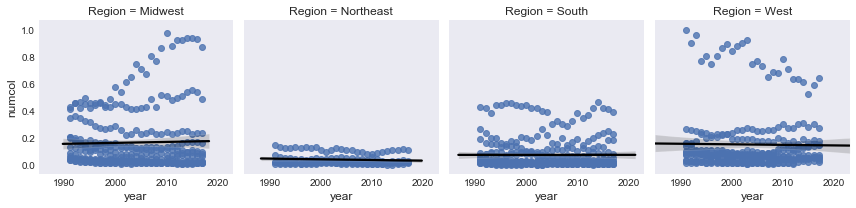

In [198]:
g = sns.FacetGrid(df, col="Region") 
g.map(sns.regplot, "year", "numcol", line_kws={"color": "black"})

I know these graphs are not fun to look at but, they are here for a reason. A quick point can be made from them. 

Mid West shows that the number of colonies is increasing even in light of an increase in neonic usage after 2003.

The North East remains mostly the same even with a small amount of pesticde usage. They seem to remain constant maybe a slight decrease.

The South shows a similar pattern to the North East with a slight decrease in number of colonies after 2003. This is consistant with the decrease in pesticide usage. 

The west shows a decrease in the number of colonies. 

There are multiple dots beaucse each state contains multiple values and the line going through the dots is a regression line. That helps to find the best-fitting straight line through the points.

# Let's look at the number of colonies by state

In [199]:
df_summed = df_pre_2003.groupby(['StateName']) ['numcol'].sum().reset_index()
trace1 = go.Bar(
    y=df_summed.StateName,
    x=df_summed.numcol,
    name='3',
    orientation = 'h',
    marker = dict(
        line = dict(
             colorscale = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                      [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
            width = 3)
    )
)
data = [trace1]
layout = go.Layout(
    title='Number of colonies by state before 2003',
    barmode='stack',
    autosize=False,
    width=1000,
    height=1000
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

Let's look at the above graph. This time we are talking about number of colonies. Again Califronia pre 2003 is in the lead but, North and South Dakota are not far behind. 

In [200]:
df_summed2 = df_2003.groupby(['StateName']) ['numcol'].sum().reset_index()
trace1 = go.Bar(
    y=df_summed2.StateName,
    x=df_summed2.numcol,
    name='4',
    orientation = 'h',
    marker = dict(
        line = dict(
             colorscale = [[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], 
                      [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
            width = 3)
    )
)
data = [trace1]
layout = go.Layout(
    title='Number of colonies by state, 2003 and after',
    barmode='stack',
    autosize=False,
    width=1000,
    height=1000
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

Now after 2003 North Dakota took the lead with California not far behind along with South Dakota. 

<b>Key points</b>


<b>North Dakota passed California after 2003 in number of colonies and were very conservative with neonic usage prior to 2003 when compared to California.

Florida, Texas and Idaho's number of colonies appear to have remained the same over time.

Now later we will have to look at the total production and yeild before and after 2003.</b>


# Specific neonic compounds used by each state


In [201]:
dat = df_pre_2003.groupby(['StateName']) ['nIMIDACLOPRID'].sum().reset_index()
da = df_2003.groupby(['StateName']) ['nIMIDACLOPRID'].sum().reset_index()
trace1 = go.Bar(
    x=dat.StateName,
    y=dat.nIMIDACLOPRID,
    name = 'Before 2003',
    marker=dict(
        color = ('cyan')
    )
)
trace2 = go.Bar(
    x=da.StateName,
    y=da.nIMIDACLOPRID,
    name='2003 and after',
    marker=dict(
        color = ('indigo')
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='nIMIDACLOPRID pre and post'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

This above graph along with the ones below show the states usage side by side with the different colors. For nIMIDACLOPRID Califronia is clearly above everyone else before and after. 

In [202]:
d1 = df_pre_2003.groupby(['StateName']) ['nTHIAMETHOXAM'].sum().reset_index()
d = df_2003.groupby(['StateName']) ['nTHIAMETHOXAM'].sum().reset_index()
trace1 = go.Bar(
    x=d1.StateName,
    y=d1.nTHIAMETHOXAM,
    name = 'Before 2003',
    marker=dict(
        color = ('cyan')
    )
)
trace2 = go.Bar(
    x=d.StateName,
    y=d.nTHIAMETHOXAM,
    name='2003 and after',
    marker=dict(
        color = ('indigo')
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='nTHIAMETHOXAM pre and post'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Iowa seems to be a propent of nTHIAMETHOXAM. However other states are also using quite a bit after 2003. After 2003 there is a big surge of its use. 

In [203]:
d4 = df_pre_2003.groupby(['StateName']) ['nACETAMIPRID'].sum().reset_index()
d5 = df_2003.groupby(['StateName']) ['nACETAMIPRID'].sum().reset_index()
trace1 = go.Bar(
    x=d4.StateName,
    y=d4.nACETAMIPRID,
    name = 'Before 2003',
    marker=dict(
        color = ('cyan')
    )
)
trace2 = go.Bar(
    x=d5.StateName,
    y=d5.nACETAMIPRID,
    name='2003 and after',
    marker=dict(
        color = ('indigo')
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='nACETAMIPRID pre and post'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

nACETAMIPRID is not very popular with any states before or after 2003 except for California, Washington, and Texas. 

In [204]:
data1 = df_pre_2003.groupby(['StateName']) ['nAllNeonic'].sum().reset_index()
data2 = df_2003.groupby(['StateName']) ['nAllNeonic'].sum().reset_index()
trace1 = go.Bar(
    x=data1.StateName,
    y=data1.nAllNeonic,
    name = 'Before 2003',
    marker=dict(
        color = ('cyan')
    )
)
trace2 = go.Bar(
    x=data2.StateName,
    y=data2.nAllNeonic,
    name='2003 and after',
    marker=dict(
        color = ('indigo')
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='All neonic pre and post'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Now after all of those different compunds of neonics here is a quick graph of total neonic usage for each state.Califronia, Illinois, Iowa, Texas, and a few others are major users. 

# Check point:
<b>Quick summery</b>


We can see that neonics were used in small amounts before 2003 and then in larger amounts 2003 and later. California was heavily using the specific neonics of nACETAMIPRID, nTHIAMETHOXAM, nIMIDACLOPRID before 2003.

nTHIACLOPRID and nCLOTHIANIDIN have not been used before to 2003. Why? Further reasearch shows these were not authorized until around 2003.

Noteable states using neonics in large amounts were Texas, Washington, and Mississippi, with the most popular neonic in usage in the years before 2003 being nTHIAMETHOXAM with quite a few states using it on their colonies.

States located in the South and West regions were more heavily involved in neonic deployment before 2003. Whereas after 2003 the Midwest passes every other region in neonic usage and the states in the South and West reduce their neonic usage.

California, Illinois and Iowa are culprits for the majority of neonic.


# Yield per colony 


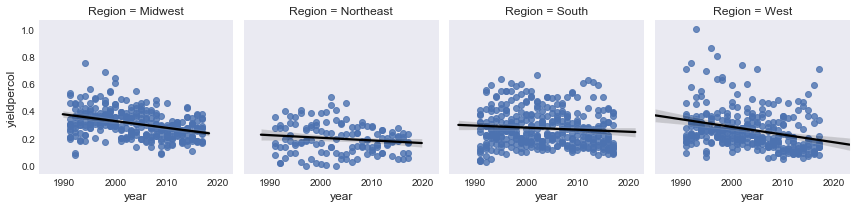

In [205]:
g = sns.FacetGrid(df, col="Region") 
g.map(sns.regplot, "year", "yieldpercol", line_kws={"color": "black"})

What can we say from the 4 above graphs? Well, yield per colony is seemingly decreasing in every region. 

## Total production per region over time

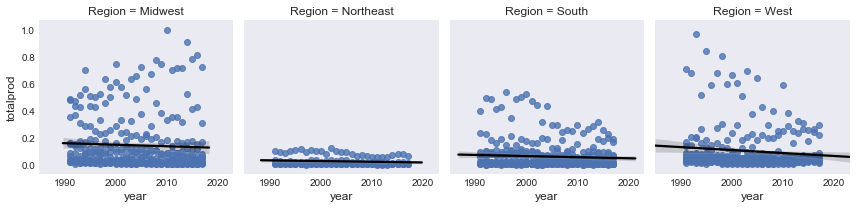

In [206]:
g = sns.FacetGrid(df, col="Region") 
g.map(sns.regplot, "year", "totalprod", line_kws={"color": "black"})

Here we can say that the total production is also decreasing in each region. This looks correct as neonics effect the bees ability to gather food and sometimes threaten the health of the whole hive.

# A deeper dive into certain states:
If you noticed several states were brought up time and time again. Now we look into them more. 

California, North Dakota, Washington, Florida, Texas, Mississippi.

## California

Text(0.5,1,'California')

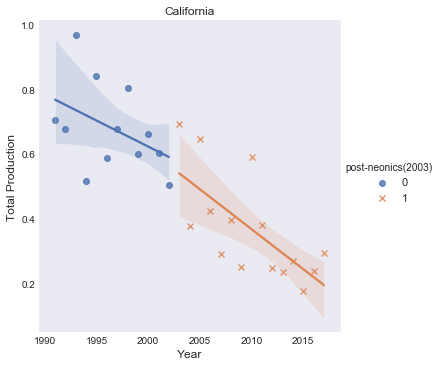

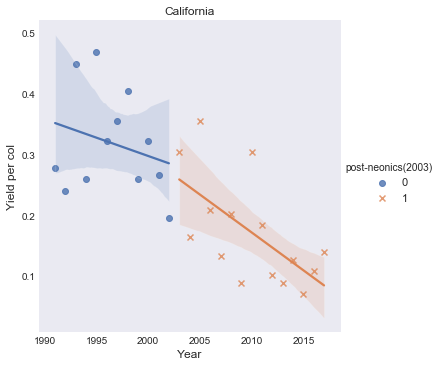

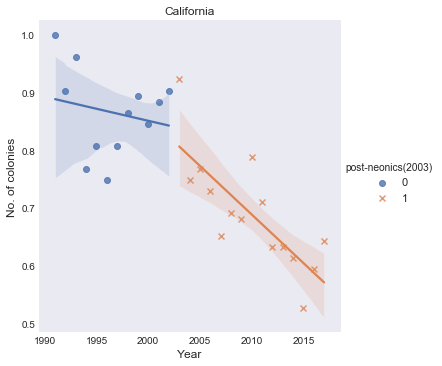

In [207]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='California'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('California')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='California'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('California')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='California'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('California')

California's no. of colonies, yield per colony and total production have been decreasing consistently since their frequent heavy use of neonics in 1994, namely Imidacloprid.

In [208]:
figure = bubbleplot(dataset=df[df.StateName=="California"].sort_values('year'), x_column='nIMIDACLOPRID', y_column='nACETAMIPRID', 
    bubble_column='state', time_column='year', size_column='nIMIDACLOPRID', 
    x_title="nIMIDACLOPRID", y_title="nACETAMIPRID", 
    title='nTHIAMETHOXAM and nCLOTHIANIDIN', 
    colorbar_title='Yield per colony (lbs)', scale_bubble=1.8, colorscale='Viridis',
    x_logscale=False, y_logscale=False, height=650) 

iplot(figure, config={'scrollzoom': True})
#2005 vals are 0.06 for nTHI and 0.16 for nCloth
#2014 vals are 0.59 for nThi and 1 for cloth 
#vals drop at 2016 significantly 
#vals are correct graph plots accuratly!
#bubble size changes accordingly 

In [209]:
data3=df[df.StateName=="California"].sort_values('year')
trace1 = go.Scatter(
    x = data3.year,
    y = data3.nIMIDACLOPRID,
    mode='markers',
    marker=dict(
        color = data3.nIMIDACLOPRID,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data3.nIMIDACLOPRID
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="nIMIDACLOPRID",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")

This bubble plot shows the two most used neonics for California. The bubble changes in size in realtion to nIMIDACLOPRID. Click play and watch it. You can show how prevalent nIMIDACLOPRID is. The values when hovering over the bubble is nIMIDACLOPRID for x and nACETAMIPRID for y. 

The number of colonies and yield per colony in California has been decreasing  since their heavy use of neonics in the mid 90s (year), specificly Imidacloprid.

## Illinois

Text(0.5,1,'Illinois')

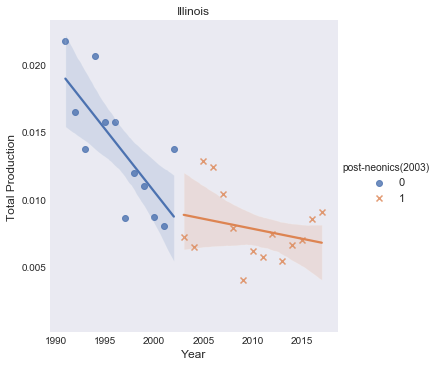

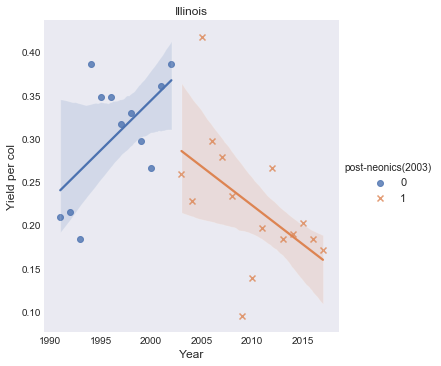

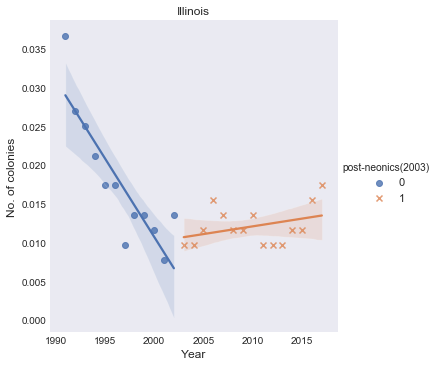

In [210]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Illinois'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Illinois')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Illinois'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Illinois')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Illinois'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Illinois')

It is interesting to see Illinois's yield per colony was increasing prior to 2003 when they were using no neonics.

In [211]:
figure = bubbleplot(dataset=df[df.StateName=="Illinois"].sort_values('year'), x_column='nTHIAMETHOXAM', y_column='nCLOTHIANIDIN', 
    bubble_column='state', time_column='year', size_column='nTHIAMETHOXAM', 
    x_title="nTHIAMETHOXAM", y_title="nCLOTHIANIDIN", 
    title='nTHIAMETHOXAM and nCLOTHIANIDIN', 
    colorbar_title='Yield per colony (lbs)', scale_bubble=1.8, colorscale='Earth',
    x_logscale=False, y_logscale=False, height=650) 

iplot(figure, config={'scrollzoom': True})
#vals drop at 2016 significantly 
#vals are correct graph plots accuratly!
#bubble size changes accordingly 

In [214]:
data3=df[df.StateName=="Illinois"].sort_values('year')
trace1 = go.Scatter(
    x = data3.year,
    y = data3.nCLOTHIANIDIN,
    mode='markers',
    marker=dict(
        color = data3.nCLOTHIANIDIN,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data3.nCLOTHIANIDIN
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="nCLOTHIANIDIN",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")

Illinois used two main neonics, nCLOTHIANIDIN and nTHIAMETHOXAM. X is nTHIAMETHOXAM and Y is nCLOTHIANIDIN when hovering. Bubble size is in realation to nTHIAMETHOXAM.

## Iowa

Text(0.5,1,'Iowa')

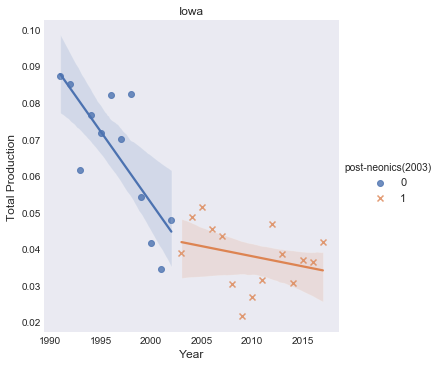

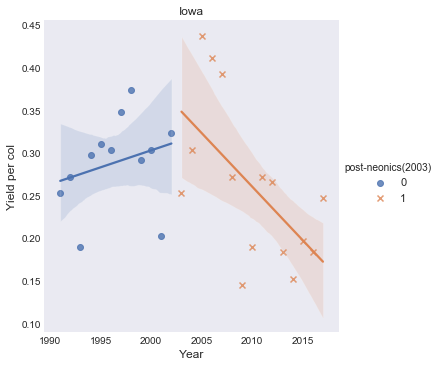

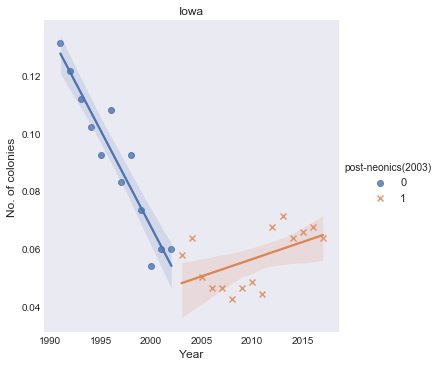

In [215]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Iowa'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Iowa')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Iowa'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Iowa')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Iowa'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Iowa')

Similar to Illinois, Iowa's total production and number of colonies were decreasing before 2003, with yield per colony increasing. Their number of colonies, however, were rapidly decreasing. In both these cases, it would seem that the introduction of neonics was beneficial in slowing colony collapse and colony numbers are now on the rise.

In [216]:
figure = bubbleplot(dataset=df[df.StateName=="Iowa"].sort_values('year'), x_column='nTHIAMETHOXAM', y_column='nCLOTHIANIDIN', 
    bubble_column='state', time_column='year', size_column='nTHIAMETHOXAM', 
    x_title="nTHIAMETHOXAM", y_title="nCLOTHIANIDIN", 
    title='nTHIAMETHOXAM and nCLOTHIANIDIN', 
    colorbar_title='Yield per colony (lbs)', scale_bubble=1.8, colorscale='Earth',
    x_logscale=False, y_logscale=False, height=650) 

iplot(figure, config={'scrollzoom': True})
#vals are correct graph plots accuratly!
#bubble size changes accordingly 

In [217]:
data3=df[df.StateName=="Iowa"].sort_values('year')
trace1 = go.Scatter(
    x = data3.year,
    y = data3.nCLOTHIANIDIN,
    mode='markers',
    marker=dict(
        color = data3.nCLOTHIANIDIN,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data3.nCLOTHIANIDIN
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='#ffffff',
  plot_bgcolor='#ffffff',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='rgba(0,0,0,1)'),
  title="nCLOTHIANIDIN",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")

Iowa used two main neonics, nCLOTHIANIDIN and nTHIAMETHOXAM. X is nCLOTHIANIDIN and Y is nTHIAMETHOXAM when hovering. Bubble size is in realation to nTHIAMETHOXAM.

## North Dakota

Text(0.5,1,'North Dakota')

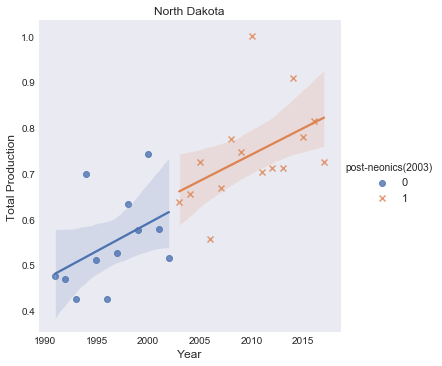

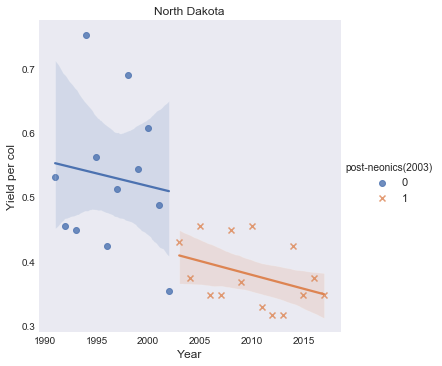

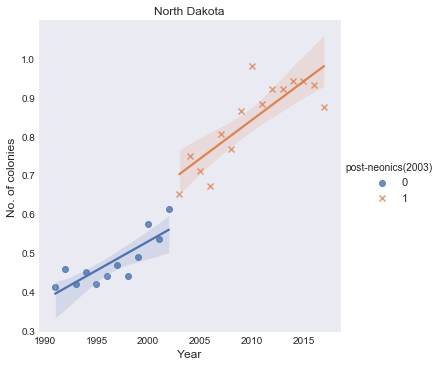

In [218]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='North Dakota'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('North Dakota')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='North Dakota'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('North Dakota')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='North Dakota'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('North Dakota')

North Dakota is one of the only states where both the number of colonies and total production have increased over time, despite overall yield per colony plummeting. Perhaps this can be attributed to their conservative usage of Imidacloprid from 1996 onwards. The neonic compound most used by this state in recent years is Clothianidin.

In [219]:
figure = bubbleplot(dataset=df[df.StateName=="North Dakota"].sort_values('year'), x_column='nTHIAMETHOXAM', y_column='nCLOTHIANIDIN', 
    bubble_column='state', time_column='year', size_column='nCLOTHIANIDIN', 
    x_title="nCLOTHIANIDIN", y_title="nIMIDACLOPRID", 
    title='nCLOTHIANIDIN and nIMIDACLOPRID', 
    colorbar_title='Yield per colony (lbs)', scale_bubble=1.8, colorscale='Earth',
    x_logscale=False, y_logscale=False, height=650) 

iplot(figure, config={'scrollzoom': True})
#vals are correct graph plots accuratly!
#bubble size changes accordingly 

In [220]:
data3=df[df.StateName=="North Dakota"].sort_values('year')
trace1 = go.Scatter(
    x = data3.year,
    y = data3.nIMIDACLOPRID,
    mode='markers',
    marker=dict(
        color = data3.nIMIDACLOPRID,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data3.nIMIDACLOPRID
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="nIMIDACLOPRID",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")

North Dakota used two main neonics, nCLOTHIANIDIN and nIMIDACLOPRID. X is nCLOTHIANIDIN and Y is nIMIDACLOPRID when hovering. Bubble size is in realation to nCLOTHIANIDIN.

## Idaho

Text(0.5,1,'Idaho')

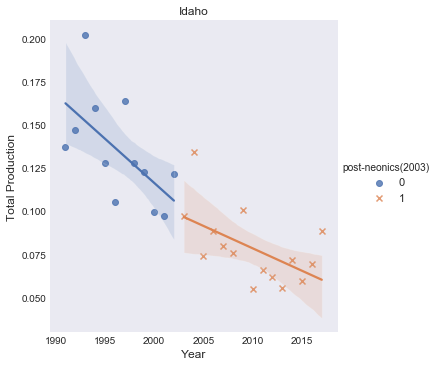

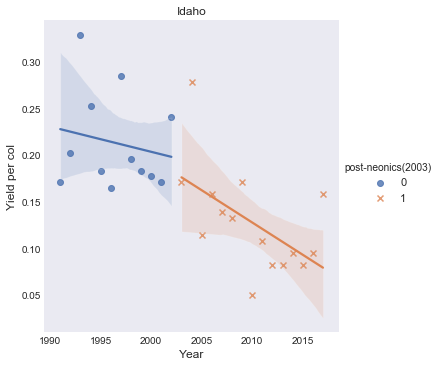

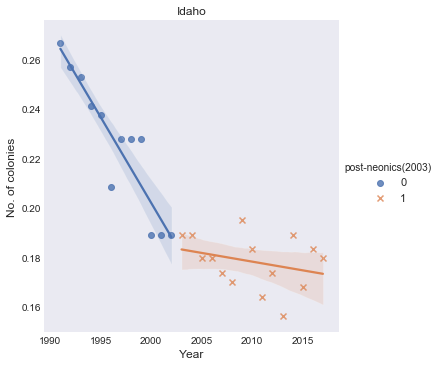

In [221]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Idaho'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Idaho')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Idaho'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Idaho')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Idaho'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Idaho')

Upon further analysis, Idaho's no. of colonies are decreasing rapidly with increasing neonic usage. Yield per colony and total production is also decreasing.

In [222]:
figure = bubbleplot(dataset=df[df.StateName=="Idaho"].sort_values('year'), x_column='nTHIAMETHOXAM', y_column='nIMIDACLOPRID', 
    bubble_column='state', time_column='year', size_column='nIMIDACLOPRID', 
    x_title="nIMIDACLOPRID", y_title="nTHIAMETHOXAM", 
    title='nTHIAMETHOXAM and nIMIDACLOPRID', 
    colorbar_title='Yield per colony (lbs)', scale_bubble=1.8, colorscale='Earth',
    x_logscale=False, y_logscale=False, height=650) 

iplot(figure, config={'scrollzoom': True})

#vals are correct graph plots accuratly!
#bubble size changes accordingly 

In [223]:
data3=df[df.StateName=="Idaho"].sort_values('year')
trace2 = go.Scatter(
    x = data3.year,
    y = data3.nIMIDACLOPRID,
    mode='markers',
    marker=dict(
        color = data3.nIMIDACLOPRID,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data3.nIMIDACLOPRID
)

data = [trace2]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="nIMIDACLOPRID",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")

Idaho used two main neonics, nTHIAMETHOXAM and nIMIDACLOPRID. X is nIMIDACLOPRID and Y is nTHIAMETHOXAM when hovering. Bubble size is in realation to nIMIDACLOPRID.

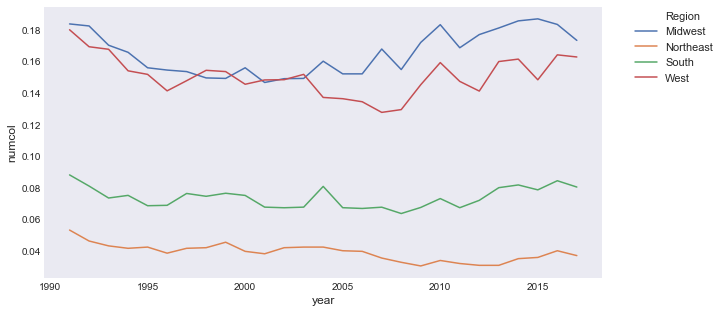

In [224]:
a=sns.lineplot(x="year", y="numcol", hue="Region", data=df, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Washington

Text(0.5,1,'Washington')

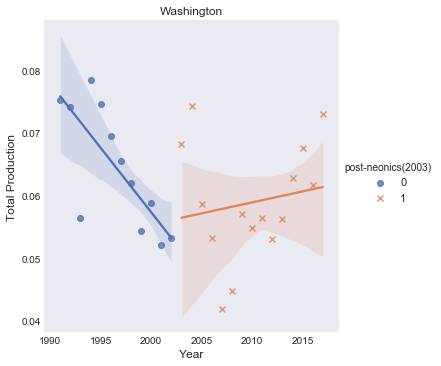

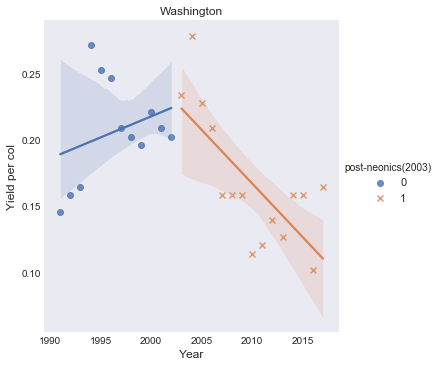

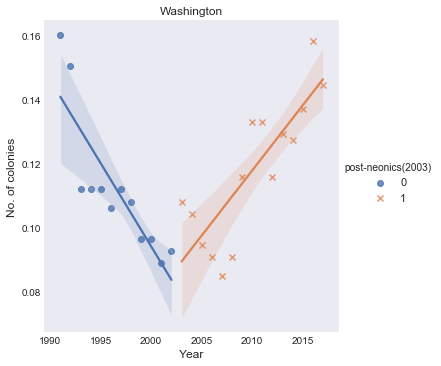

In [225]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Washington'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Washington')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Washington'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Washington')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Washington'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Washington')

Washington's total production appears to have increased after 2003 but there are a lot of outliers so this conclusion could be questioned. Washington's no. of colonies has increased rapidly after 2003 but the yield per colony is decreasing. Washington's history of neonic usage is extensive and varied with Imidacloprid being the most heavily used.

In [226]:
data_1=df[df.StateName=="Washington"].sort_values('year')
trace1 = go.Scatter(
    x = data_1.year,
    y = data_1.nTHIACLOPRID,
    mode='markers',
    marker=dict(
        color = data_1.nTHIACLOPRID,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data_1.nTHIACLOPRID
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="nTHIACLOPRID",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")
#vals are correct

## Florida

Text(0.5,1,'Florida')

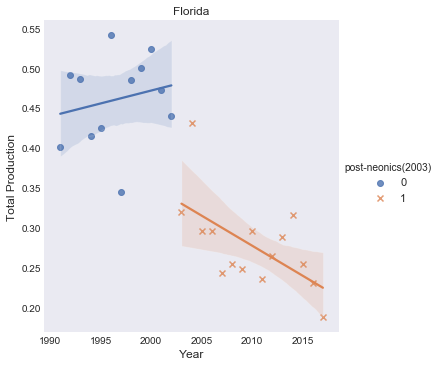

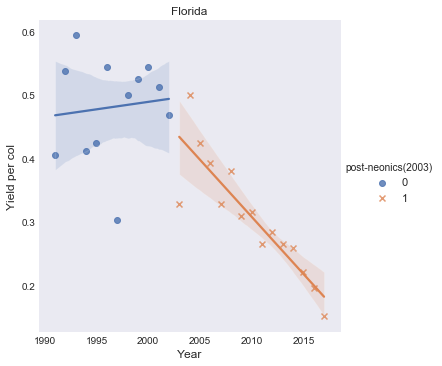

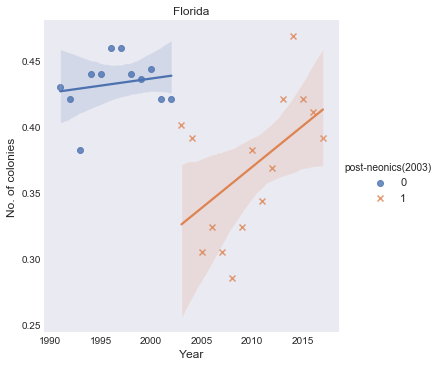

In [227]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Florida'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Florida')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Florida'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Florida')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Florida'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Florida')

Florida's total production, yield per colony and number of colonies were stable and increasing before 2003 with only moderate use of Imidacloprid. Now however, total production and yield per colony is at an all time low despite their no. of colonies increasing.

In [228]:
data2=df[df.StateName=="Florida"].sort_values('year')
trace1 = go.Scatter(
    x = data2.year,
    y = data2.nIMIDACLOPRID,
    mode='markers',
    marker=dict(
        color = data2.nIMIDACLOPRID,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data2.nIMIDACLOPRID
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='#ffffff',
  plot_bgcolor='#ffffff',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='rgba(0,0,0,1)'),
  title="nIMIDACLOPRID",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")
#proper vals

## Texas

Text(0.5,1,'Texas')

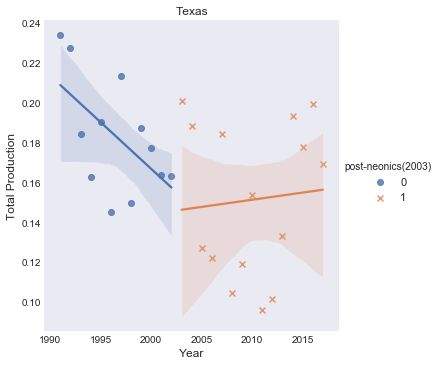

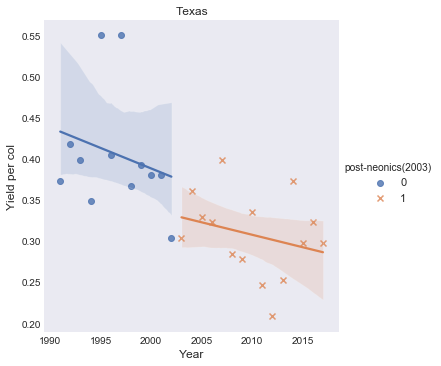

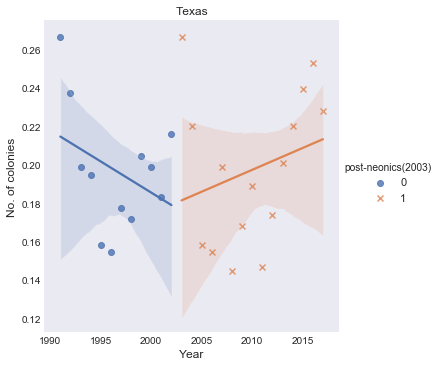

In [229]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Texas'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Texas')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Texas'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Texas')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Texas'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Texas')

Text(0.5,1,'Texas')

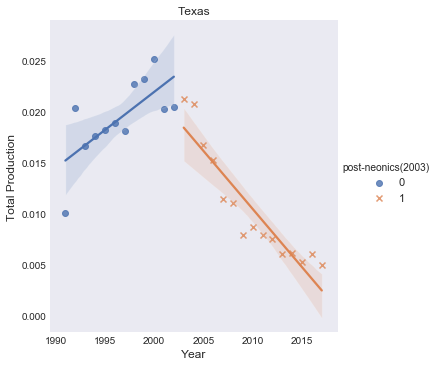

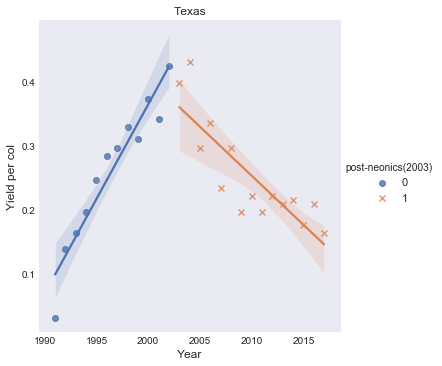

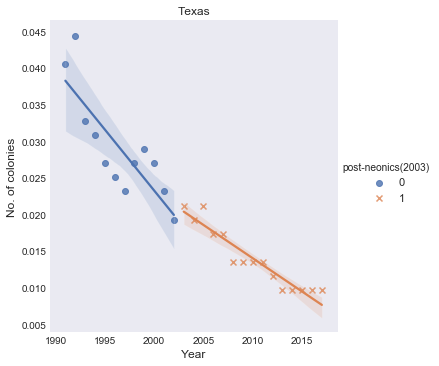

In [230]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Alabama'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('Texas')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Alabama'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('Texas')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.StateName =='Alabama'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Texas')

A large number of outliers in the total production and no. of colonies columns make it hard to definitively conclude they are in fact increasing post-2003, although it it is certain that yield per colony is decreasing.

In [231]:
data3=df[df.StateName=="Texas"].sort_values('year')
trace1 = go.Scatter(
    x = data3.year,
    y = data3.nIMIDACLOPRID,
    mode='markers',
    marker=dict(
        color = data3.nIMIDACLOPRID,#set color equal to a variable
        colorscale='Jet',
        showscale=True
    ),
    text=data3.nIMIDACLOPRID
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="nIMIDACLOPRID",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")
#proper vals

# Regions

Now that we looked at specific states I think it would be a good idea to look at the bigger picture, regions of the US.

## West

Text(0.5,1,'West')

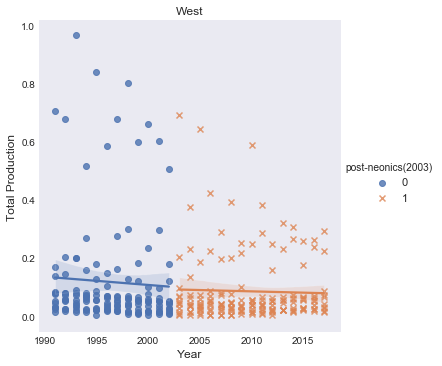

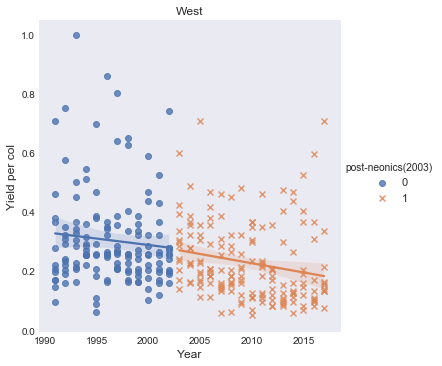

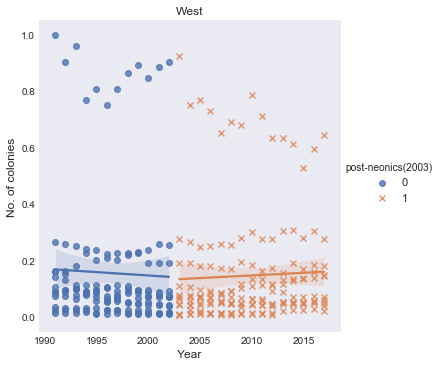

In [232]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='West'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('West')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='West'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('West')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='West'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('West')

## South

Text(0.5,1,'South')

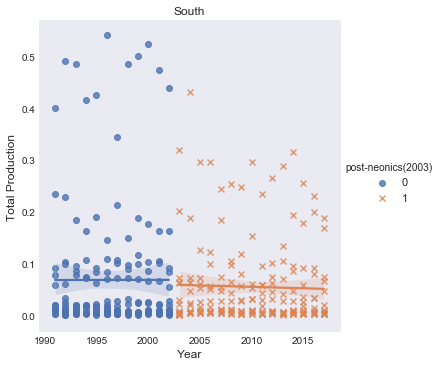

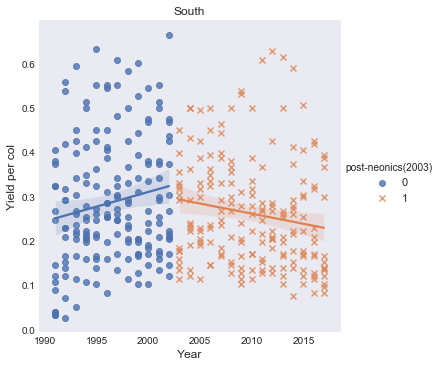

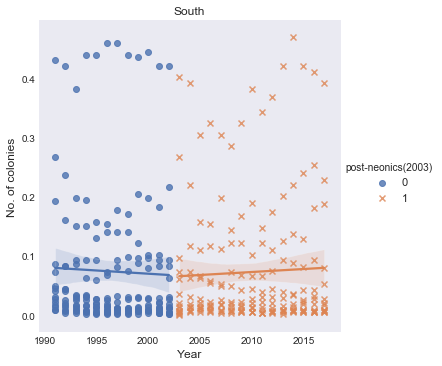

In [233]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='South'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('South')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='South'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('South')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='South'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('South')

## Mid West

Text(0.5,1,'Midwest')

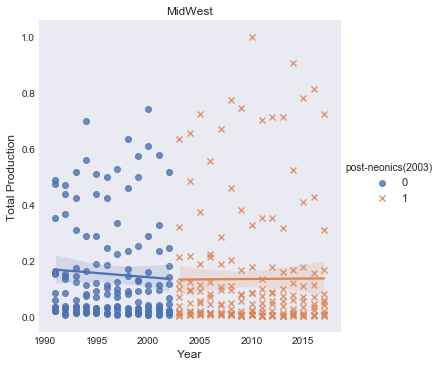

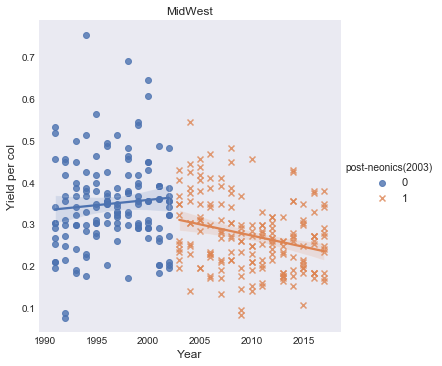

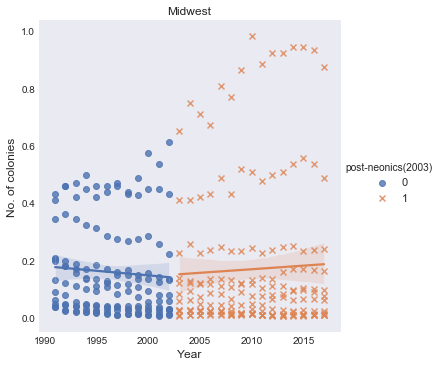

In [234]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='Midwest'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('MidWest')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='Midwest'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('MidWest')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='Midwest'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('Midwest')

## North East

Text(0.5,1,'North East')

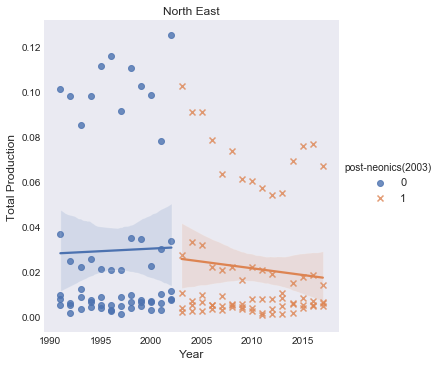

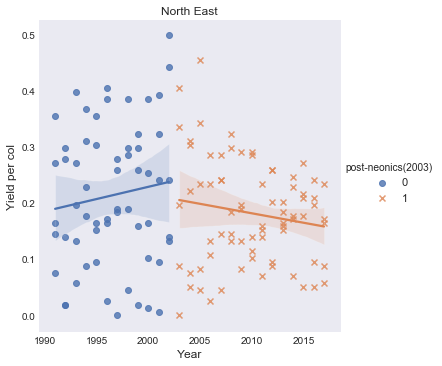

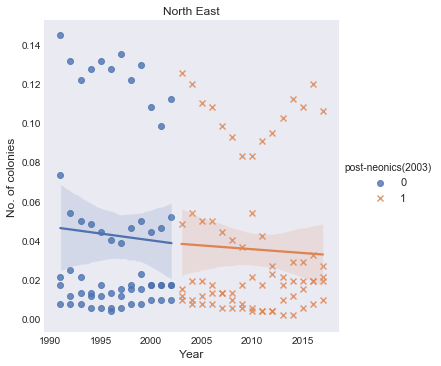

In [235]:
g = sns.lmplot(x="year", y="totalprod", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='Northeast'], markers=["o", "x"])
g.set_axis_labels("Year", "Total Production")
plt.title('North East')

g = sns.lmplot(x="year", y="yieldpercol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='Northeast'], markers=["o", "x"])
g.set_axis_labels("Year", "Yield per col")
plt.title('North East')

g = sns.lmplot(x="year", y="numcol", hue="post-neonics(2003)",
               truncate=True, size=5, data=df[df.Region =='Northeast'], markers=["o", "x"])
g.set_axis_labels("Year", "No. of colonies")
plt.title('North East')

There are a few things to take away from the regions. 
One is how the number of colonies for each region starts with a slight decrease before 2003 and a small increase after 2003.

Another is that in every reagion besides the west yield per colony is increasing beofore 2003 and decreasing after 2003. 

Finnaly total production is steady at best for each region before and after 2003. 

Even though we are looking at this from a bigger area we can still see the common trend that is number of colonies are increasing slightly after 2003. 

Yield per colony is drecreasing after 2003 at a higher rate. 

Total production is also decreasing after 2003 and a relativly slower rate. 

This may seem to contradict the rising number of colonies after 2003 but, this may suggest that the pesticides are effecting the bees slowly rather than killing them directly.

# Now let's look at the finances

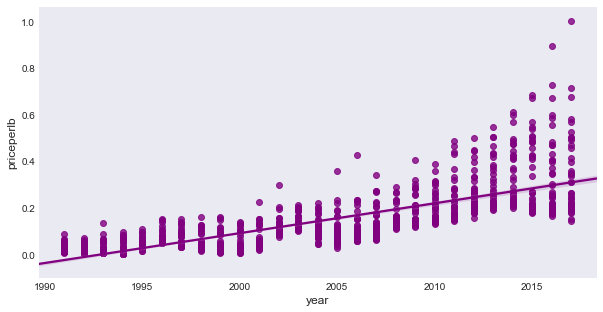

In [236]:
sns.regplot(data=df, x='year', y='priceperlb',color='purple')


In [237]:
trace1 = go.Scatter(
    x = df['year'],
    y = df['priceperlb'],
    mode='markers',
    marker=dict(
        color = df['priceperlb'],#set color equal to a variable
        colorscale='Viridis',
        showscale=True
    ),
    text=df['priceperlb']
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="Price per pound",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")
#proper vals

We can see from a simple scatter plot that throughout the years price per pound has been steadily increasing. This is intresting beaucse even after the 2003 surge the price is still steadily rising. 

year


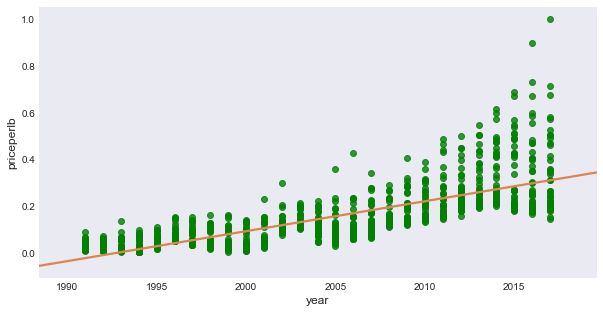

In [238]:
#sns.regplot(data=df, x='year', y='priceperlb', color='g')
from scipy import stats

x= df['year']
y= df['priceperlb']

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
print(predict_y.name)
predict_y = predict_y.rename('priceperlb')
predict_y
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7, 7)})
sns.regplot(x=x, y=y, fit_reg=False, ax=ax,scatter_kws={"color": "green"});
sns.regplot(x=x, y=predict_y,scatter=False, ax=ax, scatter_kws={"color": "green"});

Same graph as the previous one just coded slightly different. 

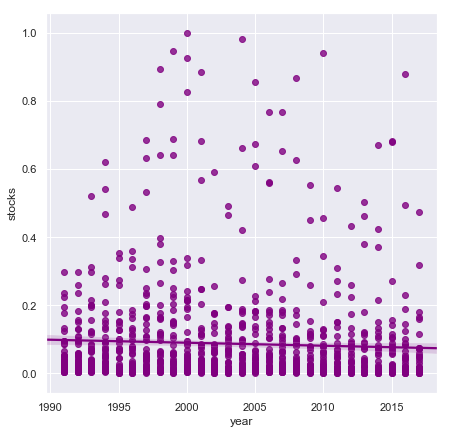

In [239]:
sns.regplot(data=df, x='year', y='stocks', color='purple')


In [240]:
trace1 = go.Scatter(
    x = df['year'],
    y = df['stocks'],
    mode='markers',
    marker=dict(
        color = df['stocks'],#set color equal to a variable
        colorscale='Viridis',
        showscale=True
    ),
    text=df['stocks']
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="Stocks",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")
#proper vals

Intresting enough stocks seem to be decreasing ever so slightly. Maybe due to the neonic surge, considering the stocks are decreasing more clearly after 2000. 

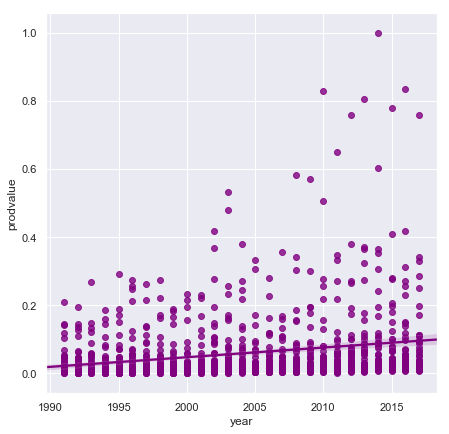

In [241]:
sns.regplot(data=df, x='year', y='prodvalue', color='purple')



In [242]:
trace1 = go.Scatter(
    x =df['year'],
    y = df['prodvalue'],
    mode='markers',
    marker=dict(
        color = df['prodvalue'],#set color equal to a variable
        colorscale='Viridis',
        showscale=True
    ),
    text=df['prodvalue']
)

data = [trace1]
layout = go.Layout(
  paper_bgcolor='rgba(0,0,0,1)',
  plot_bgcolor='rgba(0,0,0,1)',
  showlegend = False,
  font=dict(family='Courier New, monospace', size=10, color='#ffffff'),
  title="Production Value",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Scatterplot")
#proper vals

Prodcution value is increasing steadly over the years. Again this is intresting beacuse it is following a similar path with price per pound. 

# What can we say? 
Colony numbers appear to have been decreasing in a lot of states prior to the introduction of neonics. In the case of Texas, Florida, Washington, Idaho, Iowa, Illinois, their colony numbers were decreasing prior to heavy neonic deployment in 2003.

One thing that can be said for sure is that neonics are  affecting yield per colony.

North Dakota was pointed out beacuse both the number of colonies and total production have increased over time. Despite overall yield per colony decreasing a lot.

California used a heavy amount of Imidacloprid from 1994 and might have been a factor in them not regaining their colony numbers. In 1995, Idaho also used an increasing and consistent amount of Imidacloprid. Some states that still have a decreasing number of colonies seemed to be using increasing amounts of Imidacloprid from early on so maybe this specific compound is a negative influence.

Illinois and Iowa used the most neonics after California. However, on the contrast to California their number of colonies are rising and they predominantly used clothianidin.

The overall trend is a decrease in neonic usage in the U.S. after 2014. Why is this? It can be said that more people becoming aware of their toxic effects. Or other alternatives have become avaible.

Price per lb and production value of honey is increasing and stocks are decreasing.

Neonic usage in the U.S varies greatly by state as shown earlier and other factors such as climate, wildfires, diseases, temperature changes, habitat loss, pollution, possible illegal pesticde usage and other factors need to be thought about as well. 


All in all it does seem like neonics are effecting bees in one way or another. I can not say for sure that honey bees are not dying or are dying but, maybe these neonics are slowing their growth. Neonics can also be effecting the bees ability to learn, navigation, and reproduction. This can be especially connected to Imidacloprid since in most states it is the most commonly used pesticde. This would make sense as the common trend is that yield per colony and total production of honey is decreasing even in the height of pesticde usage.